# OpenFOAM Example with DAPI
## Running OpenFOAM 12 using DesignSafe API (DAPI)

## Install DesignSafe API (DAPI)

In [54]:
# DAPI installation
!pip uninstall dapi --yes --quiet
# !pip install dapi --user --quiet

# Uncomment to install development version
!pip install git+https://github.com/DesignSafe-CI/dapi.git@dev --user --quiet

# Uncomment to install editable local version
# !pip install -e ../

## Import DAPI and Initialize Client

In [1]:
import os
import json
from datetime import datetime

# Import DAPI components
from dapi import (
    DSClient,
    SubmittedJob,
    interpret_job_status,
    AppDiscoveryError,
    FileOperationError,
    JobSubmissionError,
    SystemInfoError,
    JobMonitorError,
    STATUS_TIMEOUT,
    STATUS_UNKNOWN,
    TAPIS_TERMINAL_STATES,
)

print("DAPI imports successful.")

DAPI imports successful.


In [33]:
# Initialize DAPI client
try:
    print("Initializing DSClient...")
    ds = DSClient()
    print("DSClient initialized successfully.")
except Exception as e:
    print(f"Initialization failed: {e}")
    raise SystemExit("Stopping notebook due to client initialization failure.")

Initializing DSClient...
Authentication successful.
DatabaseAccessor initialized. Connections will be created on first access.
DSClient initialized successfully.


## Find OpenFOAM Application

In [34]:
# Find OpenFOAM applications
try:
    print("Searching for OpenFOAM applications...")
    openfoam_apps = ds.apps.find("openfoam", verbose=True)

    if not openfoam_apps:
        print("No OpenFOAM applications found.")
        raise SystemExit("No OpenFOAM apps available.")

except Exception as e:
    print(f"Error finding OpenFOAM apps: {e}")
    raise SystemExit("Failed to discover OpenFOAM applications.")

Searching for OpenFOAM applications...

Found 3 matching apps:
- openfoam (Version: 9.0.0, Owner: wma_prtl)
- simcenter-openfoam-frontera (Version: 1.0.0, Owner: tg457427)
- openfoam-stampede3 (Version: 12.0.0, Owner: wma_prtl)



In [35]:
# Get details for OpenFOAM application
app_id = "openfoam-stampede3"  # Use the same app as the original example

try:
    print(f"Getting details for app: {app_id}")
    app_details = ds.apps.get_details(app_id, verbose=True)

    if not app_details:
        raise SystemExit(f"Could not find details for app '{app_id}'.")

    print(f"\nApp Description: {app_details.description}")
    print(f"App Version: {app_details.version}")
    print(f"Execution System: {app_details.jobAttributes.execSystemId}")

except Exception as e:
    print(f"Error getting app details: {e}")
    raise SystemExit("Failed to get OpenFOAM app details.")

Getting details for app: openfoam-stampede3

App Details:
  ID: openfoam-stampede3
  Version: 12.0.0
  Owner: wma_prtl
  Execution System: stampede3
  Description: OpenFOAM is free, open source software for computational fluid dynamics (CFD).

App Description: OpenFOAM is free, open source software for computational fluid dynamics (CFD).
App Version: 12.0.0
Execution System: stampede3


## Illustrative case
### Simulation of the wind flow around a square cross-section of the building using RANS model
>Case directory: DH1_run contains $0$, *constant* and *system* directories.

![frame.png](frame.png)

## Mesh generation using the *blockMesh* utility 
> Note: The grid resolution in the plot doesn't meet the requirement for running RANS simulations. This is only for an illustrative case.

![mesh.png](mesh.png)

In [36]:
# Display blockMeshDict file content (if available locally)
try:
    with open("DH1_run/system/blockMeshDict", "r") as f:
        file_contents = f.read()
        print(file_contents)
except FileNotFoundError:
    print(
        "blockMeshDict file not found locally. Please ensure the case directory is available."
    )

/*--------------------------------*- C++ -*----------------------------------*\
| =========                 |                                                 |
| \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |
|  \\    /   O peration     | Version:  2.3.1                                 |
|   \\  /    A nd           | Web:      www.OpenFOAM.org                      |
|    \\/     M anipulation  |                                                 |
\*---------------------------------------------------------------------------*/
FoamFile
{
    version     2.0;
    format      ascii;
    class       dictionary;
    object      blockMeshDict;
}
// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //
// Parametrized building geometry

//m4 definitions:







// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //
//Building length x and width y





/*--------------------------------*- C++ -*------------------------

In [37]:
# Display velocity boundary conditions (if available locally)
try:
    with open("DH1_run/0/U", "r") as f:
        file_contents = f.read()
        print(file_contents)
except FileNotFoundError:
    print(
        "Velocity file (U) not found locally. Please ensure the case directory is available."
    )

/*--------------------------------*- C++ -*----------------------------------*\
| =========                 |                                                 |
| \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |
|  \\    /   O peration     | Version:  2.3.1                                 |
|   \\  /    A nd           | Web:      www.OpenFOAM.org                      |
|    \\/     M anipulation  |                                                 |
\*---------------------------------------------------------------------------*/
FoamFile
{
    version     2.0;
    format      ascii;
    class       volVectorField;
    object      U;
}
// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //

dimensions      [0 1 -1 0 0 0 0];

internalField   uniform (0 0 0);

boundaryField
{

    inlet         
    {
        type            fixedValue;
        value           uniform (1 0 0);
    }

    outlet
    {
    	type            inletOutlet;
    	

In [38]:
# Display turbulence properties (if available locally)
try:
    with open("DH1_run/constant/turbulenceProperties", "r") as f:
        file_contents = f.read()
        print(file_contents)
except FileNotFoundError:
    print(
        "turbulenceProperties file not found locally. Please ensure the case directory is available."
    )

/*--------------------------------*- C++ -*----------------------------------*\
| =========                 |                                                 |
| \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |
|  \\    /   O peration     | Version:  2.3.1                                 |
|   \\  /    A nd           | Web:      www.OpenFOAM.org                      |
|    \\/     M anipulation  |                                                 |
\*---------------------------------------------------------------------------*/
FoamFile
{
    version     2.0;
    format      ascii;
    class       dictionary;
    location    "constant";
    object      turbulenceProperties;
}
// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //

simulationType  RAS;

RAS
{
	RASModel            kOmegaSST;

	turbulence          on;

	printCoeffs         on;
}

// ************************************************************************* //



## Setup the OpenFOAM run configuration
(Reference:
Harish, Ajay Bangalore; Govindjee, Sanjay; McKenna, Frank (2020) "CFD Notebooks (Beginner)." DesignSafe-CI. https://doi.org/10.17603/ds2-w2x6-nm09.)

> Specify the number of nodes and processors for parallel computing <br>
> Select a solver <br>
> Change to your input directory

In [39]:
# Configuration parameters
ds_path = "/home/jupyter/MyData/template-notebooks/tapis3/OpenFOAM/DH1_run"  # Update with your actual path
max_job_minutes = 5
tacc_allocation = "ASC25049"  # Update with your allocation
archive_system: str = "designsafe"

# Job configuration
job_name = "OpenFOAM-DAPI-Demo"
node_count = 1
cores_per_node = 2

# Add OpenFOAM parameters (mesh, solver, decomp)
openfoam_env_vars = [
    {"key": "mesh", "value": "On"},
    {"key": "solver", "value": "pisoFoam"},
    {"key": "decomp", "value": "On"},
]

In [40]:
# Translate local path to Tapis URI
input_uri = ds.files.translate_path_to_uri(ds_path, verify_exists=True)

Translated '/home/jupyter/MyData/template-notebooks/tapis3/OpenFOAM/DH1_run' to 'tapis://designsafe.storage.default/kks32/template-notebooks/tapis3/OpenFOAM/DH1_run' using t.username
Verifying existence of translated path: tapis://designsafe.storage.default/kks32/template-notebooks/tapis3/OpenFOAM/DH1_run
Checking system 'designsafe.storage.default' for path 'kks32/template-notebooks/tapis3/OpenFOAM/DH1_run'...
Verification successful: Path exists.


## Generate Job Request

In [52]:
# Generate job request using DAPI

job_dict = ds.jobs.generate_request(
    app_id=app_id,
    input_dir_uri=input_uri,
    max_minutes=max_job_minutes,
    allocation=tacc_allocation,
    archive_system=archive_system,
    job_name=job_name,
    node_count=node_count,  # Optional resource override
    cores_per_node=cores_per_node,  # Optional resource override
    extra_env_vars=openfoam_env_vars,
)


print("\n--- Generated Job Request Dictionary ---")
print(json.dumps(job_dict, indent=2, default=str))
print("---------------------------------------")

Generating job request for app 'openfoam-stampede3'...
Using App Details: openfoam-stampede3 v12.0.0
Auto-detected input parameter: 'Case Directory' (provided: 'Input Directory')
script_filename is None, skipping script parameter placement.
Adding/Updating TACC allocation: ASC25049
Job request dictionary generated successfully.

--- Generated Job Request Dictionary ---
{
  "name": "OpenFOAM-DAPI-Demo",
  "appId": "openfoam-stampede3",
  "appVersion": "12.0.0",
  "description": "OpenFOAM is free, open source software for computational fluid dynamics (CFD).",
  "execSystemId": "stampede3",
  "archiveSystemId": "designsafe.storage.default",
  "archiveSystemDir": "${EffectiveUserId}/tapis-jobs-archive/${JobCreateDate}/${JobUUID}",
  "archiveOnAppError": true,
  "execSystemLogicalQueue": "skx-dev",
  "nodeCount": 1,
  "coresPerNode": 2,
  "maxMinutes": 5,
  "memoryMB": 192000,
  "isMpi": false,
  "tags": [],
  "fileInputs": [
    {
      "name": "Case Directory",
      "sourceUrl": "tapis:/

## Submit Job to TACC

In [53]:
# Submit the job
submitted_job = ds.jobs.submit_request(job_dict)


--- Submitting Tapis Job Request ---
{
  "name": "OpenFOAM-DAPI-Demo",
  "appId": "openfoam-stampede3",
  "appVersion": "12.0.0",
  "description": "OpenFOAM is free, open source software for computational fluid dynamics (CFD).",
  "execSystemId": "stampede3",
  "archiveSystemId": "designsafe.storage.default",
  "archiveSystemDir": "${EffectiveUserId}/tapis-jobs-archive/${JobCreateDate}/${JobUUID}",
  "archiveOnAppError": true,
  "execSystemLogicalQueue": "skx-dev",
  "nodeCount": 1,
  "coresPerNode": 2,
  "maxMinutes": 5,
  "memoryMB": 192000,
  "isMpi": false,
  "tags": [],
  "fileInputs": [
    {
      "name": "Case Directory",
      "sourceUrl": "tapis://designsafe.storage.default/kks32/template-notebooks/tapis3/OpenFOAM/DH1_run",
      "autoMountLocal": true,
      "targetPath": "inputDirectory"
    }
  ],
  "parameterSet": {
    "envVariables": [
      {
        "key": "mesh",
        "value": "On"
      },
      {
        "key": "solver",
        "value": "pisoFoam"
      },
   

## Monitor Job Status

In [ ]:
final_status = submitted_job.monitor(interval=30)
print(f"\nJob {submitted_job.uuid} monitoring finished.")
print(f"Final status: {final_status}")
submitted_job.print_runtime_summary(verbose=False)


Monitoring Job: 314cac7f-bb28-4a56-a440-47374ccd11ce-007


Waiting for job to start: 0 checks [00:00, ? checks/s]

## Access Job Output and Archive

In [51]:
# Display job output if in terminal state
if "submitted_job" in locals() and final_status in submitted_job.TERMINAL_STATES:
    print(f"\n--- Job Output for {submitted_job.uuid} (Status: {final_status}) ---")
    max_output_lines = 50

    # Get standard output
    try:
        stdout_content = submitted_job.get_output_content(
            "tapisjob.out", max_lines=max_output_lines, missing_ok=False
        )
        if stdout_content is not None:
            print(f"\n--- Last {max_output_lines} lines of tapisjob.out ---")
            print(stdout_content)
            print("------------------------------------")
        else:
            print("\n[INFO] tapisjob.out was not found or is empty.")
    except FileOperationError as e:
        print(f"\n[ERROR] Could not retrieve tapisjob.out: {e}")
    except Exception as e:
        print(f"\n[ERROR] Unexpected error retrieving tapisjob.out: {e}")

    # Get error output for failed jobs
    if final_status in ["FAILED", "ARCHIVING_FAILED"]:
        try:
            stderr_content = submitted_job.get_output_content(
                "tapisjob.err", max_lines=max_output_lines, missing_ok=True
            )
            if stderr_content is not None:
                print(f"\n--- Last {max_output_lines} lines of tapisjob.err ---")
                print(stderr_content)
                print("------------------------------------")
            else:
                print("\n[INFO] tapisjob.err was not found.")
        except FileOperationError as e:
            print(f"\n[ERROR] Could not retrieve tapisjob.err: {e}")
        except Exception as e:
            print(f"\n[ERROR] Unexpected error retrieving tapisjob.err: {e}")
    print("----------------------------------------------------")
else:
    print("\nSkipping job output display (job not in terminal state).")


--- Job Output for 5c333614-e7b3-4a03-acaf-52d88bcc9161-007 (Status: FINISHED) ---
Attempting to fetch content of 'tapisjob.out' from job archive...
Returning last 50 lines of 'tapisjob.out'.

--- Last 50 lines of tapisjob.out ---
++++ complete -o filenames -o nospace -F _wmakeSchedulerUptime_ wmakeSchedulerUptime
++++ complete -o filenames -o nospace -F _wrmo_ wrmo
++ cd inputDirectory
++ v1=On
++ v2=Off
++ t2=olaFlow
++ d1=On
++ echo On
On
++ m1=On
++ echo On
On
++ t1=pisoFoam
++ echo pisoFoam
pisoFoam
++ '[' pisoFoam == olaFlow ']'
++ '[' On == On ']'
++ '[' On == On ']'
++ blockMesh
++ decomposePar
++ ibrun pisoFoam -parallel
[0] 
[0] 
[0] --> FOAM FATAL IO ERROR: 
[0] keyword omegaFinal is undefined in dictionary "/scratch/05873/kks32/tapis/5c333614-e7b3-4a03-acaf-52d88bcc9161-007/inputDirectory/system/fvSolution/solvers"
[0] 
[0] file: /scratch/05873/kks32/tapis/5c333614-e7b3-4a03-acaf-52d88bcc9161-007/inputDirectory/system/fvSolution/solvers from line 22 to line 64.
[0] 
[0]   

In [56]:
# Access job archive
try:
    print(f"\nAttempting to access archive information...")
    archive_uri = submitted_job.archive_uri
    if archive_uri:
        print(f"Job Archive Tapis URI: {archive_uri}")
        print("\nListing archive contents (root):")
        outputs = ds.files.list(archive_uri)
        if outputs:
            for item in outputs:
                print(
                    f"- {item.name} (Type: {item.type}, Size: {item.size} bytes, Modified: {item.lastModified})"
                )
        else:
            print("No files found in the archive root directory.")
    else:
        print("Archive URI not available for this job.")
except FileOperationError as e:
    print(f"Could not list archive files: {e}")
except Exception as e:
    print(f"Unexpected error while accessing archive information: {e}")


Attempting to access archive information...
Job Archive Tapis URI: tapis://designsafe.storage.default/kks32/tapis-jobs-archive/2025-06-09Z/314cac7f-bb28-4a56-a440-47374ccd11ce-007

Listing archive contents (root):
Listing files in system 'designsafe.storage.default' at path 'kks32/tapis-jobs-archive/2025-06-09Z/314cac7f-bb28-4a56-a440-47374ccd11ce-007'...
Found 4 items.
- inputDirectory (Type: dir, Size: 4096 bytes, Modified: 2025-06-09T16:52:26Z)
- tapisjob.out (Type: file, Size: 70308 bytes, Modified: 2025-06-09T16:52:24Z)
- tapisjob.sh (Type: file, Size: 1154 bytes, Modified: 2025-06-09T16:52:20Z)
- tapisjob_app.sh (Type: file, Size: 1722 bytes, Modified: 2025-06-09T16:52:20Z)


## Post-processing
### Using *ParaView* to visualize the flow fields
*ParaView* can read *OpenFOAM* files using *.foam*.

>If .foam is not included in the case directory, you can copy the archive results:

>**import shutil**

>**shutil.copy2('case_directory/foam.foam', 'destination_path')**

![ParaView.png](paraview.png)

### Plot the time series of the force coefficients
> Update the path to point to your job's archive directory.

In [57]:
# Get DesignSafe Jupyter path
archive_path = ds.files.translate_uri_to_path(archive_uri)
print(archive_path)

/home/jupyter/MyData/tapis-jobs-archive/2025-06-09Z/314cac7f-bb28-4a56-a440-47374ccd11ce-007


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Load force coefficients data using pandas for cleaner parsing
import pandas as pd

force_data_path = (
    archive_path + "/inputDirectory/postProcessing/forceCoeffs1/0/forceCoeffs.dat"
)

# Read the file, skipping header lines and using tab separator
data = pd.read_csv(force_data_path, sep="\t", skiprows=9, header=None)
print(f"Loaded force coefficients data with shape: {data.shape}")

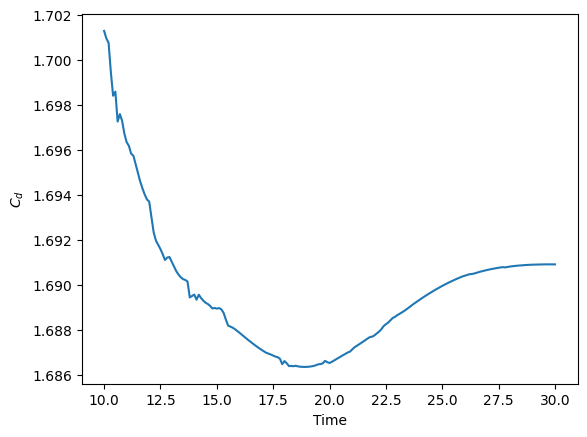

In [ ]:
# Plot drag coefficient (Cd) vs time
plt.plot(data.iloc[100:, 0], data.iloc[100:, 2])
plt.xlabel("Time")
plt.ylabel("$C_d$")
plt.title("Drag Coefficient vs Time")
plt.grid(True)
plt.show()

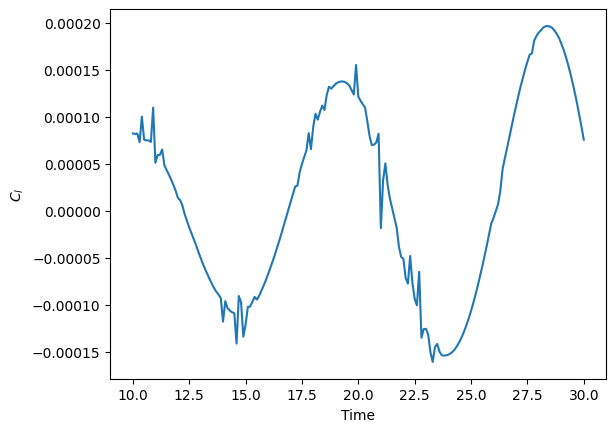

In [ ]:
# Plot lift coefficient (Cl) vs time
plt.plot(data.iloc[100:, 0], data.iloc[100:, 3])
plt.xlabel("Time")
plt.ylabel("$C_l$")
plt.title("Lift Coefficient vs Time")
plt.grid(False)
plt.show()